# Evaluation Of Duet Benchmarking Results from Distributed Database "Cassandra"

### Imports

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
from pathlib import Path

In [31]:
# cwd = Path.cwd()
# filepath = os.path.join(cwd, "Results", "1.25mCops_4t", "AA", "run_measurements3.csv")
# print(filepath)
# df3 = pd.read_csv(filepath)

In [32]:
# cwd = Path.cwd()
# filepath = os.path.join(cwd, "Results", "1.25mCops_4t", "AA", "run_measurements2.csv")
# print(filepath)
# df2 = pd.read_csv(filepath)

### Import Benchmarking Measurements as csv file and create Pandas Dataframe for further Analysis

In [33]:
cwd = Path.cwd()
filepath = os.path.join(cwd, "Results", "international","1mAops_4t", "AB", "load_measurements3.csv")
print(filepath)
df = pd.read_csv(filepath)

C:\Users\Felix Medicus\Desktop\Thesis_MCC\DuetBenchmarking\Results\Results\international\1mAops_4t\AB\load_measurements3.csv


In [34]:
# df = pd.concat([df1, df2, df3])
# df = df1

### Set Versions as Variables

In [35]:
workloadLoad = "Workload C: 100% Insert"
workloadRun = "Workload C: 100% Read"
phase = "Run"
versionA = "Version A: Cassandra 4.0.4"
versionB = "Version B: Cassandra 3.0.27"

### Insert latencies in ms into the measurement table

In [36]:
df["latency_ms"] = (df["received"]- df["sent"])/1000000

In [37]:
df["sent_ms"] = df["sent"].div(1000000)
df["received_ms"] = df["received"].div(1000000)

In [38]:
df.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,4.999995e+05,1.271530e+12,1.271537e+12,7.223907e+00,1.271530e+06,1.271537e+06
std,2.886752e+05,2.059133e+11,2.059130e+11,3.442164e+01,2.059133e+05,2.059130e+05
min,0.000000e+00,9.388238e+11,9.388816e+11,4.732490e-01,9.388238e+05,9.388816e+05
25%,2.499998e+05,1.076589e+12,1.076598e+12,1.399925e+00,1.076589e+06,1.076598e+06
50%,4.999995e+05,1.266822e+12,1.266827e+12,1.984353e+00,1.266822e+06,1.266827e+06
75%,7.499992e+05,1.431176e+12,1.431179e+12,3.750516e+00,1.431176e+06,1.431179e+06
max,9.999990e+05,1.716543e+12,1.716544e+12,2.010081e+03,1.716543e+06,1.716544e+06


In [39]:
df = df.sort_values(by="sent", ascending=True)
df.head()

,workerId,queryType,queryId,sent,received,target-region,latency_ms,sent_ms,received_ms
13,w1-vA,INSERT,0,938823817061,938915824915,europe-west1,92.007854,938823.817061,938915.824915
1,w1-vB,INSERT,750006,938828867192,938882520598,europe-west1,53.653406,938828.867192,938882.520598
14,w1-vA,INSERT,750006,938828968730,938921050164,europe-west1,92.081434,938828.968730,938921.050164
2,w1-vB,INSERT,500004,938829037774,938881764336,europe-west1,52.726562,938829.037774,938881.764336
15,w1-vA,INSERT,500004,938829102504,938921050166,europe-west1,91.947662,938829.102504,938921.050166


### Restructure Timeline

In [40]:
firstSent = df["sent"].min()
df["sent_sec"] = (df["sent"] - firstSent)/1000000/1000

### Return benchmark run time (First request send to last response received)

In [41]:
totalTime = df["sent"].max() - df["sent"].min()
print(totalTime/1000000/1000, "seconds", "or", totalTime/1000000/1000/60, "m") 


777.719646307 seconds or 12.961994105116666 m


### Prune Measurements and print new run time for pruned benchmark (Remove first and last 100 seconds)

In [42]:
dfPruned = df.loc[(df["sent_sec"] > 200) & (df["sent_sec"] < (totalTime/1000000/1000) - 300)]

In [43]:
totalTime = dfPruned["sent"].max() - dfPruned["sent"].min()
print("Pruned time:\n",totalTime/1000000/1000, "seconds", "or", totalTime/1000000/1000/60, "minutes") 

Pruned time:
 277.71871796799996 seconds or 4.628645299466666 minutes


### Create subsets of dataframe (for Version A and B, and for each worker for Version A and B) 

In [44]:
dfA1 = dfPruned.loc[(dfPruned["workerId"] == "w1-vA")]
dfA2 = dfPruned.loc[(dfPruned["workerId"] == "w2-vA")]
dfA3 = dfPruned.loc[(dfPruned["workerId"] == "w3-vA")]
dfB1 = dfPruned.loc[(dfPruned["workerId"] == "w1-vB")]
dfB2 = dfPruned.loc[(dfPruned["workerId"] == "w2-vB")]
dfB3 = dfPruned.loc[(dfPruned["workerId"] == "w3-vB")]
dfA = dfPruned.loc[(dfPruned["workerId"] == "w1-vA") | (dfPruned["workerId"] == "w2-vA") | (dfPruned["workerId"] == "w3-vA")]
dfB = dfPruned.loc[(dfPruned["workerId"] == "w1-vB") | (dfPruned["workerId"] == "w2-vB") | (dfPruned["workerId"] == "w3-vB")]
dfARaw = df.loc[(df["workerId"] == "w1-vA") | (df["workerId"] == "w2-vA") | (df["workerId"] == "w3-vA")]
dfBRaw = df.loc[(df["workerId"] == "w1-vB") | (df["workerId"] == "w2-vB") | (df["workerId"] == "w3-vB")]
dfR1 = df.loc[(df["target-region"] == "europe-west1")]
dfR2 = df.loc[(df["target-region"] == "europe-west2")]
dfR3 = df.loc[(df["target-region"] == "europe-west3")]
dfAUpdate = dfA.loc[(dfA["queryType"] == "UPDATE")]
dfBUpdate = dfB.loc[(dfB["queryType"] == "UPDATE")]
dfARead = dfA.loc[(dfA["queryType"] == "SELECT")]
dfBRead = dfB.loc[(dfB["queryType"] == "SELECT")]

In [45]:
dfARaw.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,499999.500000,1.283770e+12,1.283777e+12,7.324970,1.283770e+06,1.283777e+06,344.946003
std,288675.278932,2.192349e+11,2.192345e+11,33.513974,2.192349e+05,2.192345e+05,219.234917
min,0.000000,9.388238e+11,9.389158e+11,0.473249,9.388238e+05,9.389158e+05,0.000000
25%,249999.750000,1.075615e+12,1.075623e+12,1.466916,1.075615e+06,1.075623e+06,136.790799
50%,499999.500000,1.269854e+12,1.269859e+12,2.083629,1.269854e+06,1.269859e+06,331.030559
75%,749999.250000,1.454402e+12,1.454421e+12,3.840424,1.454402e+06,1.454421e+06,515.578262
max,999999.000000,1.716543e+12,1.716544e+12,1679.034872,1.716543e+06,1.716544e+06,777.719646


In [46]:
dfBRaw.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,499999.500000,1.259290e+12,1.259298e+12,7.122845,1.259290e+06,1.259298e+06,320.466637
std,288675.278932,1.908850e+11,1.908848e+11,35.305712,1.908850e+05,1.908848e+05,190.884992
min,0.000000,9.388289e+11,9.388816e+11,0.485129,9.388289e+05,9.388816e+05,0.005050
25%,249999.750000,1.077616e+12,1.077621e+12,1.341151,1.077616e+06,1.077621e+06,138.791813
50%,499999.500000,1.263591e+12,1.263593e+12,1.883030,1.263591e+06,1.263593e+06,324.767069
75%,749999.250000,1.408425e+12,1.408434e+12,3.653334,1.408425e+06,1.408434e+06,469.601215
max,999999.000000,1.650558e+12,1.650559e+12,2010.080914,1.650558e+06,1.650559e+06,711.733716


In [47]:
dfA.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,381957.000000,3.819570e+05,3.819570e+05,381957.000000,3.819570e+05,3.819570e+05,381957.000000
mean,515434.063465,1.274899e+12,1.274907e+12,8.100610,1.274899e+06,1.274907e+06,336.074912
std,285721.807479,7.712855e+10,7.712799e+10,40.444578,7.712855e+04,7.712799e+04,77.128554
min,48624.000000,1.138868e+12,1.138872e+12,0.512270,1.138868e+06,1.138872e+06,200.043889
25%,301062.000000,1.207656e+12,1.207667e+12,1.378394,1.207656e+06,1.207667e+06,268.832486
50%,551625.000000,1.275431e+12,1.275440e+12,1.776480,1.275431e+06,1.275440e+06,336.607335
75%,803172.000000,1.337597e+12,1.337600e+12,2.643649,1.337597e+06,1.337600e+06,398.773592
max,999998.000000,1.416519e+12,1.416650e+12,1679.034872,1.416519e+06,1.416650e+06,477.695177


In [48]:
dfB.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,442753.000000,4.427530e+05,4.427530e+05,442753.000000,4.427530e+05,4.427530e+05,442753.000000
mean,518989.097409,1.285948e+12,1.285956e+12,7.469916,1.285948e+06,1.285956e+06,347.124251
std,282486.357394,8.098573e+10,8.098489e+10,41.172896,8.098573e+04,8.098489e+04,80.985725
min,74922.000000,1.138824e+12,1.138825e+12,0.504710,1.138824e+06,1.138825e+06,200.000220
25%,329686.000000,1.215950e+12,1.215955e+12,1.283938,1.215950e+06,1.215955e+06,277.126165
50%,578836.000000,1.290364e+12,1.290366e+12,1.640376,1.290364e+06,1.290366e+06,351.540057
75%,749573.000000,1.359611e+12,1.359615e+12,2.361917,1.359611e+06,1.359615e+06,420.786704
max,999998.000000,1.416543e+12,1.416652e+12,2010.080914,1.416543e+06,1.416652e+06,477.718938


### Calculate Percentiles

In [49]:
ninetyA = dfA["latency_ms"].dropna().quantile([.9])
ninetynineA = dfA["latency_ms"].dropna().quantile([.99])
print("90% percentile versionA --> ", ninetyA, "\n99% percentile Version A --> ", ninetynineA)


90% percentile versionA -->  0.9    5.451943
Name: latency_ms, dtype: float64 
99% percentile Version A -->  0.99    168.705225
Name: latency_ms, dtype: float64


In [50]:
ninetyB = dfB["latency_ms"].dropna().quantile([.9])
ninetynineB = dfB["latency_ms"].dropna().quantile([.99])
print("90% percentile versionA --> ", ninetyB, "\n99% percentile Version A --> ", ninetynineB)

90% percentile versionA -->  0.9    4.801353
Name: latency_ms, dtype: float64 
99% percentile Version A -->  0.99    150.990992
Name: latency_ms, dtype: float64


### Min. Latencies for Worker 2 (A & B)

In [51]:
dfA2.loc[dfA2["latency_ms"].idxmin()]

workerId                  w2-vA
queryType                INSERT
queryId                  593932
sent              1222474731858
received          1222475244128
target-region      europe-west2
latency_ms              0.51227
sent_ms          1222474.731858
received_ms      1222475.244128
sent_sec             283.650915
Name: 925669, dtype: object

In [52]:
dfB1.loc[dfB1["latency_ms"].idxmin()]

workerId                  w1-vB
queryType                INSERT
queryId                  637356
sent              1370888177092
received          1370888812526
target-region      europe-west1
latency_ms             0.635434
sent_ms          1370888.177092
received_ms      1370888.812526
sent_sec              432.06436
Name: 306203, dtype: object

In [53]:
df[df.received == 999999999999999999].shape[0]


0

### Some checks

#### Time difference in ms when first query was sent by worker-1 to Version A and B 

In [54]:

dfA2["sent"].min() - dfB2["sent"].min()

248529425

#### Time difference in ms when last query was sent by worker-1 to Version A and B 

In [55]:
dfA1["sent"].max() - dfB1["sent"].max() 


-137318508

## Create Figures 

### Create Boxplots

In [56]:
sns.set_theme(style="darkgrid")
print(len(dfA))

381957


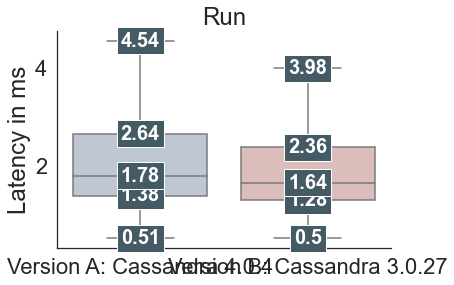

In [57]:

combined_dfs = pd.DataFrame({versionA: dfA['latency_ms'],
                             versionB: dfB['latency_ms']})
                             
sns.set_style('white')
sns.set_context('notebook', font_scale=2.0)

box_plot = sns.boxplot(data=combined_dfs, color='white', showfliers=False, whis=1.5,palette="vlag").set_title(phase)




ax = box_plot.axes
ax.set_ylabel("Latency in ms")
lines = ax.get_lines()

categories = ax.get_xticks()

for i in range(0,5):
    for cat in categories:

        y = round(lines[(i+cat*5)].get_ydata()[0],2) 

        ax.text(
            cat, 
            y, 
            f'{y}', 
            ha='center', 
            va='center', 
            fontweight='bold', 
            size=20,
            color='white',
            bbox=dict(facecolor='#445A64'))


sns.despine()



In [58]:
sns.set_context("notebook")
sns.set(rc={'figure.figsize':(30,8)})
print(len(df))

2000000


### Create Lineplot comparing latencies of Version A and B

In [ ]:
subchartA = dfARaw[['sent_sec', 'latency_ms']]
subchartB = dfBRaw[['sent_sec', 'latency_ms']]
subchartA["100sec_average"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
subchartB["100sec_average"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)

p = sns.lineplot(data=subchartA, x="sent_sec", y="100sec_average", linewidth=0.25)
title =  phase + " " + workloadLoad  if phase=="Run" else phase
sns.lineplot(data=subchartB, x='sent_sec',y='100sec_average', linewidth=0.25).set_title(title)
p.set_xlabel("Seconds");
p.set_ylabel("Latency in ms");


C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_16072\3440065847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subchartA["100sec_average"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_16072\3440065847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subchartB["100sec_average"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)


In [ ]:
subchartA = dfA[['sent_sec', 'latency_ms']]
subchartB = dfB[['sent_sec', 'latency_ms']]
subchartA["100sec_average"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
subchartB["100sec_average"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)

p = sns.lineplot(data=subchartA, x="sent_sec", y="100sec_average", linewidth=0.25)
title =  phase + " " + workloadLoad  if phase=="Run" else phase
sns.lineplot(data=subchartB, x='sent_sec',y='100sec_average', linewidth=0.25).set_title(title)
p.set_xlabel("Seconds");
p.set_ylabel("Latency in ms");

In [ ]:
dfAr1Read = dfA1.loc[(dfA1["queryType"] == "SELECT")]
dfAr2Read = dfA2.loc[(dfA2["queryType"] == "SELECT")]
dfAr3Read = dfA3.loc[(dfA3["queryType"] == "SELECT")]
dfBr1Read = dfB1.loc[(dfB1["queryType"] == "SELECT")]
dfBr2Read = dfB2.loc[(dfB2["queryType"] == "SELECT")]
dfBr3Read = dfB3.loc[(dfB3["queryType"] == "SELECT")]
dfAr1Update = dfA1.loc[(dfA1["queryType"] == "UPDATE")]
dfAr2Update = dfA2.loc[(dfA2["queryType"] == "UPDATE")]
dfAr3Update = dfA3.loc[(dfA3["queryType"] == "UPDATE")]
dfBr1Update = dfB1.loc[(dfB1["queryType"] == "UPDATE")]
dfBr2Update = dfB2.loc[(dfB2["queryType"] == "UPDATE")]
dfBr3Update = dfB3.loc[(dfB3["queryType"] == "UPDATE")]

In [ ]:
subchartA = dfARead[['sent_sec', 'latency_ms']]
subchartB = dfBRead[['sent_sec', 'latency_ms']]
subchartA["100sec_average"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
subchartB["100sec_average"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)

p = sns.lineplot(data=subchartA, x="sent_sec", y="100sec_average", linewidth=0.25)
title =  phase + " " + workloadLoad  if phase=="Run" else phase
sns.lineplot(data=subchartB, x='sent_sec',y='100sec_average', linewidth=0.25).set_title(title)
p.set_xlabel("Seconds");
p.set_ylabel("Latency in ms");

In [ ]:
subchartA = dfAUpdate[['sent_sec', 'latency_ms']]
subchartB = dfBUpdate[['sent_sec', 'latency_ms']]
subchartA["100sec_average"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
subchartB["100sec_average"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)

p = sns.lineplot(data=subchartA, x="sent_sec", y="100sec_average", linewidth=0.25)
title =  phase + " " + workloadLoad  if phase=="Run" else phase
sns.lineplot(data=subchartB, x='sent_sec',y='100sec_average', linewidth=0.25).set_title(title)
p.set_xlabel("Seconds");
p.set_ylabel("Latency in ms");

In [ ]:
dfAUpdate.describe()

In [ ]:
dfBUpdate.describe()

In [ ]:
dfARead.describe()

In [ ]:
dfBRead.describe()